In [43]:
import numpy as np
#import matplotlib.pyplot as  plt
import os
#import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [44]:
data3='C:/Users/levent/Downloads/data3'

In [45]:
uzantı_list=['png','jpg','jpeg','bmp']

In [46]:
import imghdr

In [ ]:
for image_class in os.listdir(data3): 
    for image in os.listdir(os.path.join(data3, image_class)):
        image_path = os.path.join(data3, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in uzantı_list: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [18]:
dataload=tf.keras.utils.image_dataset_from_directory(data3)

Found 317 files belonging to 2 classes.


In [19]:
batch = dataload.as_numpy_iterator().next()


In [20]:
type(batch)

tuple

In [21]:
batch[1]

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1])

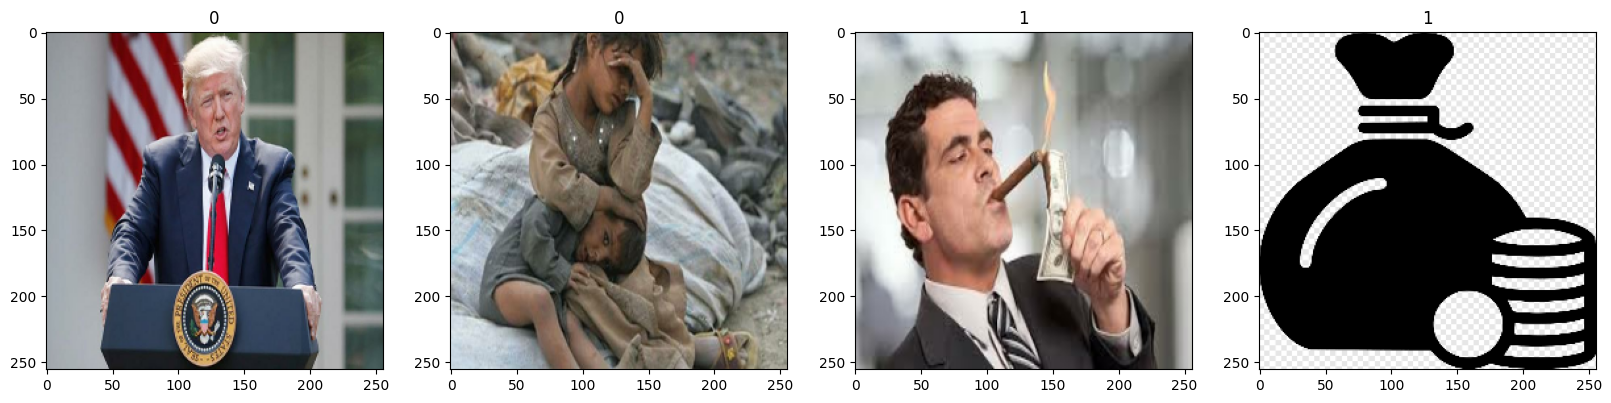

In [22]:
#rich-->1
#brock-->0
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
len(dataload)

10

In [24]:
train_size=int(len(dataload)*0.7) 
val_size=int(len(dataload)*0.2) 
test_size=int(len(dataload)*0.1)

In [25]:
print(test_size)

1


In [26]:
train=dataload.take(train_size)
val=dataload.skip(train_size).take(val_size)
test=dataload.skip(train_size+val_size).take(test_size)

In [27]:
model3=Sequential()

In [28]:
model3.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model3.add(MaxPooling2D())
model3.add(Conv2D(64, (3,3), 1, activation='relu'))
model3.add(MaxPooling2D()) 
model3.add(Conv2D(32, (3,3), 1, activation='relu'))
model3.add(MaxPooling2D())
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

C:\Users\levent\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model3.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [30]:
eğitim3=model3.fit(train, epochs=20,validation_data=val)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 556ms/step - accuracy: 0.4306 - loss: 335.9065 - val_accuracy: 0.3594 - val_loss: 6.0653
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 496ms/step - accuracy: 0.4959 - loss: 3.9657 - val_accuracy: 0.7188 - val_loss: 0.5591
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 506ms/step - accuracy: 0.6695 - loss: 0.6472 - val_accuracy: 0.7656 - val_loss: 0.4924
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 461ms/step - accuracy: 0.8011 - loss: 0.4465 - val_accuracy: 0.7188 - val_loss: 0.4160
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 619ms/step - accuracy: 0.7538 - loss: 0.3774 - val_accuracy: 0.8750 - val_loss: 0.3453
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 482ms/step - accuracy: 0.8638 - loss: 0.2822 - val_accuracy: 0.9219 - val_loss: 0.2539
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 494ms/step - accuracy: 0.8568 - loss: 0.2465 - val_accuracy: 0.9375 - val_loss: 0.1420
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 482ms/step - accuracy: 0.9079 - loss: 0.1775 - val_accuracy: 0.9375 - val_los

In [31]:
arr=np.array(eğitim3.history)
print(arr)

{'accuracy': [0.4241071343421936, 0.5446428656578064, 0.7232142686843872, 0.7946428656578064, 0.7901785969734192, 0.8794642686843872, 0.8794642686843872, 0.9330357313156128, 0.9241071343421936, 0.9375, 0.9598214030265808, 0.9642857313156128, 0.9821428656578064, 0.9732142686843872, 0.9776785969734192, 0.9776785969734192, 0.96875, 0.9732142686843872, 0.9776785969734192, 0.9732142686843872], 'loss': [244.69825744628906, 2.4627013206481934, 0.5662683844566345, 0.41688013076782227, 0.3738333284854889, 0.2658141851425171, 0.24567954242229462, 0.1713191270828247, 0.14755596220493317, 0.121456578373909, 0.07911908626556396, 0.07422828674316406, 0.03740635886788368, 0.0435149185359478, 0.03975389525294304, 0.03439352661371231, 0.037793803960084915, 0.03256852179765701, 0.02461797557771206, 0.03392238914966583], 'val_accuracy': [0.359375, 0.71875, 0.765625, 0.71875, 0.875, 0.921875, 0.9375, 0.9375, 0.921875, 0.96875, 0.96875, 0.96875, 0.984375, 0.984375, 0.953125, 1.0, 0.984375, 0.96875, 0.96875

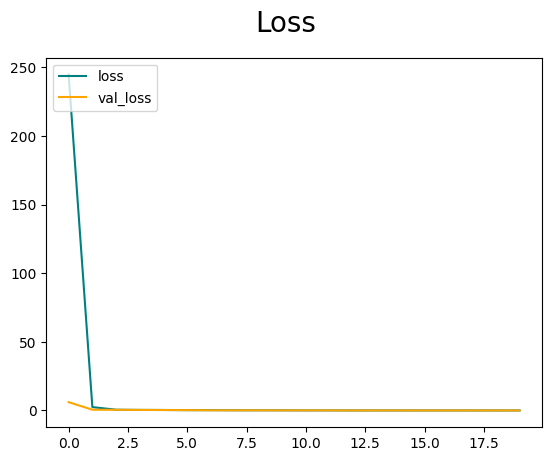

In [32]:
fig = plt.figure()
plt.plot(eğitim3.history['loss'], color='teal', label='loss')
plt.plot(eğitim3.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [33]:
pr=Precision()
rc=Recall()
ba=BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator():
    x,y=batch
    sonuc=model3.predict(x)
    pr.update_state(y,sonuc)
    rc.update_state(y,sonuc)
    ba.update_state(y,sonuc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


In [35]:
print(sonuc[3])

[2.0994314e-08]


In [36]:
print(pr.result(),rc.result(),ba.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [38]:
import cv2

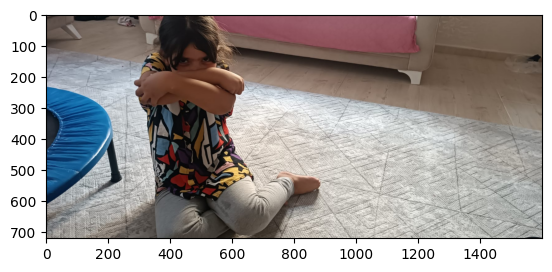

In [39]:
melek = cv2.imread("C:/Users/levent/Downloads/fakir_melek_2.0.jpeg")
plt.imshow(cv2.cvtColor(melek,cv2.COLOR_BGR2RGB))
plt.show()


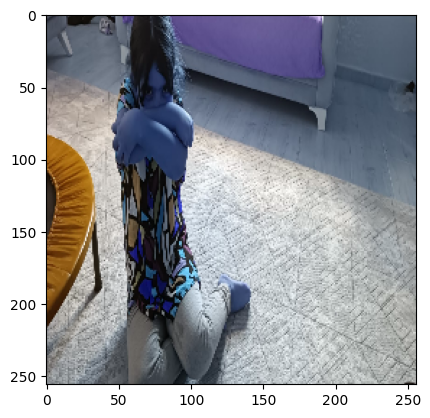

In [40]:
resize3=tf.image.resize(melek,(256,256))
plt.imshow(resize3.numpy().astype(int))      
plt.show()                        

In [41]:
yhat = model3.predict(np.expand_dims(resize3/255, 0))
print(yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[0.4667446]]


In [42]:
if yhat <=0.5:
    print("fakir")
else:
    print("zengin")

fakir
